In [1]:
from experiment import Experiment
%matplotlib inline

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
var_dict = dict(
    numerical_vars = ['A2','A3','A8','A11','A14','A15'],
    categorical_vars = ['A1','A4','A5','A6','A7','A9','A10','A12','A13'],
    class_var = 'class'
)

In [24]:
exp = Experiment('data/credit1.csv', 
                 var_dict,
                 embedding_dim=16,
                 lr=1.0,
                 cv=5,
                 weight_decay=0.0,
                 batch_size=1024,
                 n_epoch=100,
                 verbose=True,
                 n_bins_range=[3, 5, 7],
                 n_init_bins_list=[5, 7])

In [25]:
exp.data.shape

(654, 16)

In [26]:
list_of_scores = exp.perform_exp()

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:838: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:838: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:838: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:838: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:838: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))


12.277820348739624 training start
>>> Epoch = 1, Loss = 0.12644636631011963
[2, 4, 2, 2, 3, 2] 0.195972586035
>>> Epoch = 2, Loss = 0.11688753217458725
[2, 4, 2, 2, 3, 2] 0.199211887264
>>> Epoch = 3, Loss = 0.11060781031847
[2, 4, 2, 2, 3, 2] 0.199906852828
>>> Epoch = 4, Loss = 0.1084028109908104
[2, 4, 2, 2, 3, 2] 0.200028016886
>>> Epoch = 5, Loss = 0.10718787461519241
[2, 4, 2, 2, 3, 2] 0.200161952064
>>> Epoch = 6, Loss = 0.10348378121852875
[2, 4, 2, 2, 3, 2] 0.200202355851
>>> Epoch = 7, Loss = 0.10929214954376221
[2, 4, 2, 2, 3, 2] 0.200917592001
>>> Epoch = 8, Loss = 0.10739149153232574
[2, 4, 2, 2, 3, 2] 0.200990355878
>>> Epoch = 9, Loss = 0.10484607517719269
[2, 4, 2, 2, 3, 2] 0.20065275167
>>> Epoch = 10, Loss = 0.10530682653188705
[2, 4, 2, 2, 3, 2] 0.199393072317
>>> Epoch = 11, Loss = 0.10607258230447769
[2, 4, 2, 2, 3, 2] 0.195779975697
>>> Epoch = 12, Loss = 0.10371533781290054
[2, 2, 2, 2, 3, 2] 0.209049374242
>>> Epoch = 13, Loss = 0.10633733123540878
[2, 2, 2, 2, 

>>> Epoch = 7, Loss = 0.08878996968269348
[3, 2, 2, 2, 2, 2] -0.0213963592646
>>> Epoch = 8, Loss = 0.08738744258880615
[3, 2, 2, 2, 2, 2] -0.021866001615
>>> Epoch = 9, Loss = 0.0843919888138771
[3, 2, 2, 2, 2, 2] -0.0217711209061
>>> Epoch = 10, Loss = 0.08567727357149124
[3, 2, 2, 2, 2, 2] -0.0207987891791
>>> Epoch = 11, Loss = 0.08558078110218048
[3, 2, 2, 2, 2, 2] -0.0226490269813
>>> Epoch = 12, Loss = 0.08489375561475754
[3, 2, 2, 2, 2, 2] -0.0230604489497
>>> Epoch = 13, Loss = 0.08585356175899506
[3, 2, 2, 2, 2, 2] -0.0243322120647
>>> Epoch = 14, Loss = 0.08433559536933899
[3, 2, 2, 2, 2, 2] -0.0264289976709
>>> Epoch = 15, Loss = 0.08516410738229752
[3, 6, 2, 2, 2, 2] -0.017781392891
>>> Epoch = 16, Loss = 0.08498058468103409
[3, 6, 2, 2, 2, 2] -0.0201937378764
>>> Epoch = 17, Loss = 0.0829785019159317
[3, 6, 2, 2, 2, 2] -0.0240285528224
>>> Epoch = 18, Loss = 0.08753129094839096
[3, 6, 2, 2, 2, 2] -0.0239734621502
>>> Epoch = 19, Loss = 0.08219961076974869
[2, 6, 2, 2, 2, 

In [27]:
result = exp.print_scores(list_of_scores)

In [43]:
result.sort_values(by='dt_acc', ascending=False)

,disc_method,dt_acc,kmeans_nmi,lr_acc,n_disc_cols,nb_acc,rf_acc,svc_acc
3,ew_5,"(0.799956226979, 0.10741467633)",0.077042,"(0.836726454207, 0.127021303805)",30,"(0.854931226534, 0.104622539179)","(0.825992455382, 0.123721749757)","(0.862681008559, 0.14117180462)"
0,raw,"(0.799932916956, 0.104470443512)",0.025701,"(0.842856990338, 0.120843006127)",48,"(0.452600224203, 0.00182934330388)","(0.83666809018, 0.122993547868)","(0.60687378779, 0.0620695276454)"
2,ef_3,"(0.792194345095, 0.0711226588795)",0.240790,"(0.850409082012, 0.111324787127)",16,"(0.853311802701, 0.0764001590319)","(0.835071442552, 0.110442183718)","(0.862681008559, 0.14117180462)"
4,ef_5,"(0.787707432517, 0.0889608920241)",0.239714,"(0.848952650403, 0.111736373392)",26,"(0.857961885443, 0.089751906095)","(0.855012900585, 0.111304628418)","(0.859627573444, 0.138473103356)"
1,ew_3,"(0.787683232798, 0.121001223882)",0.022607,"(0.847413832986, 0.128438151402)",18,"(0.856516308119, 0.114284136282)","(0.832029751419, 0.110934288311)","(0.862681008559, 0.14117180462)"
7,sb_5,"(0.783161266215, 0.119045349967)",0.241214,"(0.847390522963, 0.117197284088)",14,"(0.833486716845, 0.08854075907)","(0.838206551718, 0.114174820777)","(0.862681008559, 0.14117180462)"
8,sb_7,"(0.783010017972, 0.0970837498425)",0.278952,"(0.842763572306, 0.116907856319)",15,"(0.85173793128, 0.0918387313023)","(0.82286855638, 0.125639316584)","(0.862681008559, 0.14117180462)"
6,ef_7,"(0.779992348618, 0.0746030687557)",0.186141,"(0.855025000445, 0.10232684886)",36,"(0.856423245965, 0.0984252003314)","(0.851959287532, 0.113830257724)","(0.859627573444, 0.138473103356)"
5,ew_7,"(0.75863965551, 0.112290271543)",0.022607,"(0.844313599886, 0.122787210661)",42,"(0.845747611167, 0.0942940787189)","(0.827483585117, 0.138661416871)","(0.862681008559, 0.14117180462)"


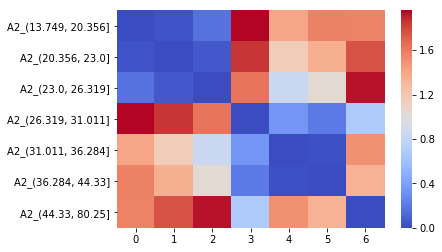

In [33]:
exp.semantic_binning.plot_pairwise_distance_between_bins('A2')

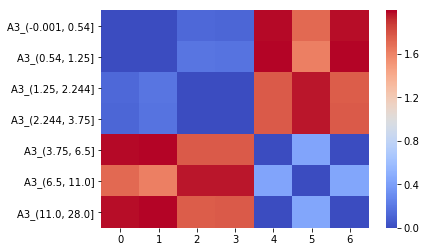

In [34]:
exp.semantic_binning.plot_pairwise_distance_between_bins('A3')

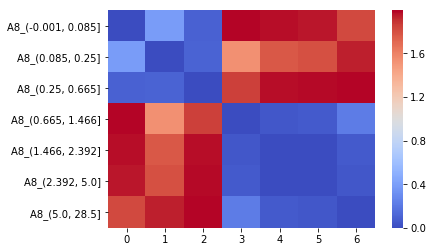

In [35]:
exp.semantic_binning.plot_pairwise_distance_between_bins('A8')

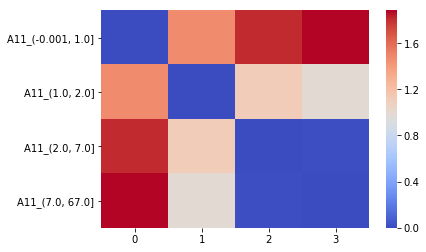

In [36]:
exp.semantic_binning.plot_pairwise_distance_between_bins('A11')

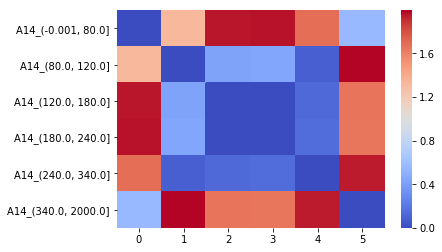

In [37]:
exp.semantic_binning.plot_pairwise_distance_between_bins('A14')

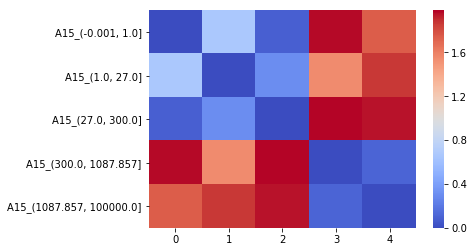

In [38]:
exp.semantic_binning.plot_pairwise_distance_between_bins('A15')

In [39]:
for var, bins in exp.semantic_binning.bins_by_var.items():
    print(var)
    print(bins['bins'])

A2
['(13.749, 26.319]', '(26.319, 44.33]', '(44.33, 80.25]']
A3
['(-0.001, 3.75]', '(3.75, 28.0]']
A8
['(-0.001, 0.665]', '(0.665, 28.5]']
A11
['(-0.001, 1.0]', '(1.0, 2.0]', '(2.0, 67.0]']
A14
['(-0.001, 80.0]', '(80.0, 340.0]', '(340.0, 2000.0]']
A15
['(-0.001, 300.0]', '(300.0, 100000.0]']


In [42]:
import torch

In [ ]:
torch.optim.Adagrad()